In [44]:
conda install -c conda-forge netcdf4

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [45]:

import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import xarray as xr

%matplotlib inline
plt.rcParams.update({'font.size': 12})

In [46]:
# Change the filename to where your data are stored
filename = '/Users/gabriel/Desktop/DATA-LASP/bou_dmin.nc'

dataset = nc.Dataset(filename)

In [47]:
print(dataset)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Source_of_Data: United States Geological Survey (USGS)
    Station_Name: Boulder
    IAGA_CODE: BOU
    Latitude: 40.1375
    Longitude: -105.2372
    Elevation: 1682
    Sensor_Orientation: HDZF
    Digital_Sampling: 100.0 second
    Data_Interval_Type: filtered 1-minute (00:15-01:45)
    Data_Type: Definitive
    url: https://geomag.usgs.gov/monitoring/observatories/boulder
    file_conversion_author: Greg Lucas (glucas@usgs.gov)
    dimensions(sizes): Time(20383200)
    variables(dimensions): int64 Time(Time), float64 X(Time), float64 Y(Time), float64 Z(Time)
    groups: 


In [48]:
print(dataset.__dict__)

{'Source_of_Data': 'United States Geological Survey (USGS)', 'Station_Name': 'Boulder', 'IAGA_CODE': 'BOU', 'Latitude': 40.1375, 'Longitude': -105.2372, 'Elevation': 1682, 'Sensor_Orientation': 'HDZF', 'Digital_Sampling': '100.0 second', 'Data_Interval_Type': 'filtered 1-minute (00:15-01:45)', 'Data_Type': 'Definitive', 'url': 'https://geomag.usgs.gov/monitoring/observatories/boulder', 'file_conversion_author': 'Greg Lucas (glucas@usgs.gov)'}


In [49]:
for dim in dataset.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'Time', size = 20383200


In [50]:
for var in dataset.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
int64 Time(Time)
    units: minutes since 1978-04-01 00:00:00
    calendar: proleptic_gregorian
unlimited dimensions: Time
current shape = (20383200,)
filling on, default _FillValue of -9223372036854775806 used
<class 'netCDF4._netCDF4.Variable'>
float64 X(Time)
    _FillValue: nan
    description: X-component (Geographic North) of the magnetic field
    units: nT
unlimited dimensions: Time
current shape = (20383200,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 Y(Time)
    _FillValue: nan
    description: Y-component (Geographic East) of the magnetic field
    units: nT
unlimited dimensions: Time
current shape = (20383200,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 Z(Time)
    _FillValue: nan
    description: Z-component (Geographic Down [-r]) of the magnetic field
    units: nT
unlimited dimensions: Time
current shape = (20383200,)
filling on


In [51]:
# Dataframe Creation

ds = xr.open_dataset(filename)
df = ds.to_dataframe()
df.reset_index(inplace=True)

In [52]:
df.head(5)

,Time,X,Y,Z
0,1978-04-01 00:00:00,20859.298088,4611.664806,51315.0
1,1978-04-01 00:01:00,20858.321666,4611.448934,51315.0
2,1978-04-01 00:02:00,20858.321666,4611.448934,51315.0
3,1978-04-01 00:03:00,20860.274510,4611.880678,51315.0
4,1978-04-01 00:04:00,20860.274510,4611.880678,51315.0


In [53]:
df.shape[0]

20383200

Text(0, 0.5, 'X-component of magnetic field')

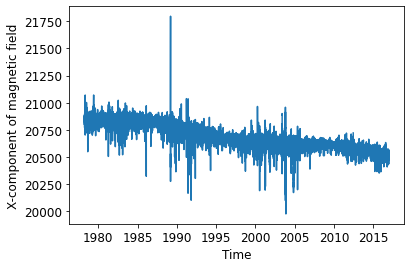

In [54]:
# Plot the time series for the x component
plt.plot(df['Time'], df['X'])
plt.xlabel('Time')
plt.ylabel('X-component of magnetic field')

In [55]:
# Exploring Data dropouts

# Difference in time between rows

df['Time_Diff'] = df['Time'].diff()

In [56]:
df['Time_Diff'].max() # check the max time diff

Timedelta('0 days 00:01:00')

In [57]:
# Print the number of nans in each column
for col in df.columns.to_list():
    print(col, df[col].isna().sum())

Time 0
X 514403
Y 514403
Z 560742
Time_Diff 1


In [58]:
df_1978 = df[df['Time'] < pd.Timestamp(1978, 4, 15)]
inds_1978 = list(pd.isnull(df_1978['X']).to_numpy().nonzero()[0]) # indices of NaN values for the X component
inds_len_1978 = len(inds_1978) # number of NaNs in the X component

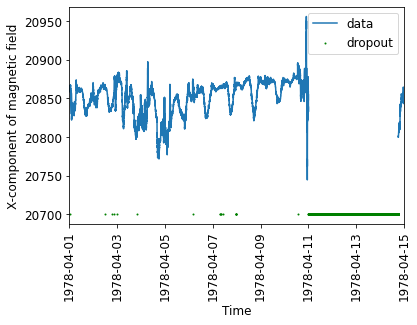

In [59]:
# Plot the 1978 data
plt.plot(df_1978['Time'], df_1978['X'], label='data')
plt.xlabel('Time')
plt.ylabel('X-component of magnetic field')

# This just puts a green dot anywhere there is a data dropout. 
# The y-value 20700 is just so it displays at the bottom.
plt.scatter(df_1978['Time'][inds_1978], [20700]*inds_len_1978, color='g', label='dropout', s=1)
plt.xlim([datetime.date(1978, 4, 1), datetime.date(1978, 4, 15)])
plt.xticks(rotation=90)
plt.legend()